<a href="https://colab.research.google.com/github/Krylze/Data-Science/blob/main/Resolver_problema_Social_Ads_(Clasificaci%C3%B3n)_usando_Arboles_de_Decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Ciencia de Datos/Data/Social_Network_Ads.csv")
data.sample(10)

,Age,EstimatedSalary,Purchased
234,38,112000,0
13,32,18000,0
231,39,42000,0
159,32,135000,1
135,23,63000,0
109,38,80000,0
392,45,45000,1
2,26,43000,0
315,39,75000,1
326,41,72000,0


# Arboles de Desicion
## Segmentar datos en training y test

In [ ]:
from sklearn.model_selection import train_test_split
x = data.iloc[:, 1:14]
y = data.Purchased
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

320
80
320
80


## Entrenar Modelo

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="gini", random_state=7, max_depth=6)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(y_pred[0:10]) #Es un numpay array
print(y_test[0:10]) #Es una serie

[1 0 0 0 1 1 1 0 1 0]
265    1
65     0
120    0
132    0
378    1
26     1
287    1
111    0
280    1
164    0
Name: Purchased, dtype: int64


# Evaluar el modelo

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(" ")
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred, labels = [0, 1]))
print(" ")
print("Classification Report")
print(classification_report(y_test, y_pred))

Accuracy:  1.0
 
Confusion Matrix
[[54  0]
 [ 0 26]]
 
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        26

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



# Graficar el Arbol

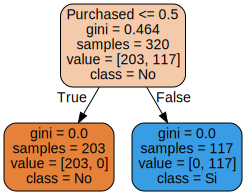

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

graph = export_graphviz(classifier, filled=True, rounded =True, class_names=["No", "Si"], feature_names = list (x.columns))
graphviz.Source(graph)

# Bosques aleatorios
## Entrenar modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, criterion="gini", random_state=7)
clf.fit(x_train, y_train)
y_predBosque = clf.predict(x_test)
print(y_predBosque[0:10]) #Es un numpay array
print(y_test[0:10]) #Es una serie
#print(clf.score(x_test, y_predBosque))

[1 0 0 0 1 1 1 0 1 0]
265    1
65     0
120    0
132    0
378    1
26     1
287    1
111    0
280    1
164    0
Name: Purchased, dtype: int64


## Evaluar el modelo

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_predBosque))
print(" ")
print("Confusion Matrix")
print(confusion_matrix(y_test, y_predBosque, labels = [0, 1]))
print(" ")
print("Classification Report")
print(classification_report(y_test, y_predBosque))

Accuracy:  1.0
 
Confusion Matrix
[[54  0]
 [ 0 26]]
 
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        26

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



## Graficar el Arbol

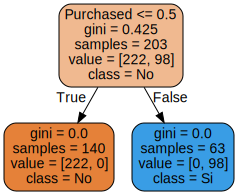

In [ ]:
from math import exp
from sklearn.tree import export_graphviz
import graphviz

tree = clf.estimators_[25]
graph = export_graphviz(tree, filled=True, rounded =True, class_names=["No", "Si"], feature_names = list (x.columns))
graphviz.Source(graph)